In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import uns
import pandas as pd
import os
import glob

folder = r'/Users/chrisv/Code/CDIPS'

#imfolder='/home/chrisv/code/test'
predfolder = folder + '/test_output'
pattern = os.path.join(predfolder, '{}_prediction.npy')
fnames = glob.glob(pattern.format('*'))


chrisv on Mac


In [2]:
indices = np.argsort([int(f.split('/')[-1].split('_')[0]) for f in fnames])
orderedfnames = [fnames[i] for i in indices]


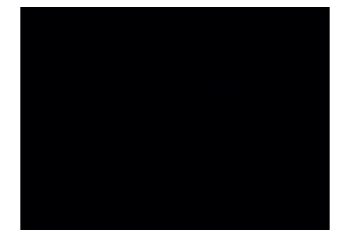

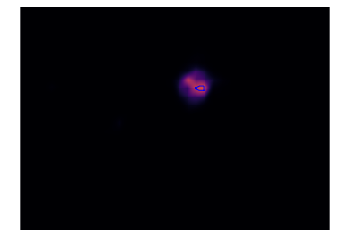

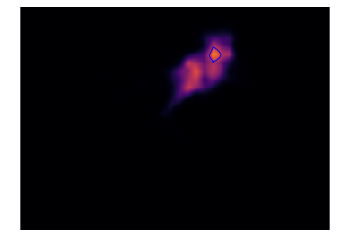

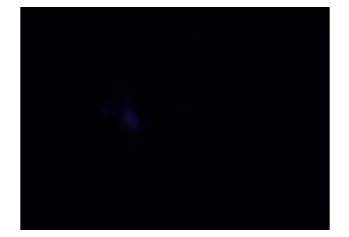

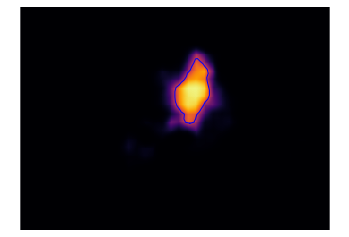

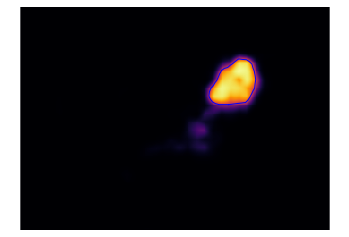

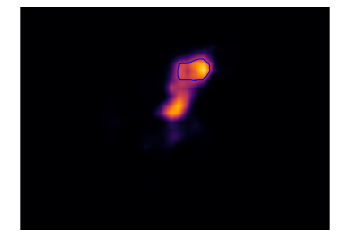

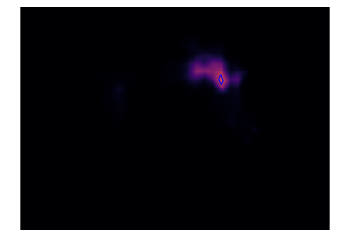

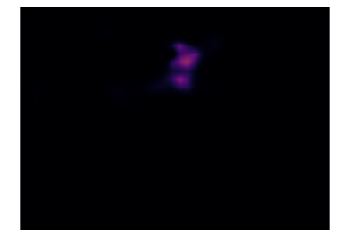

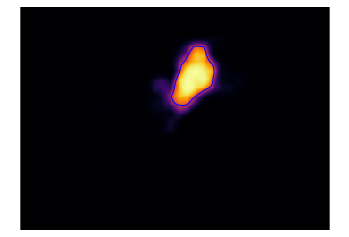

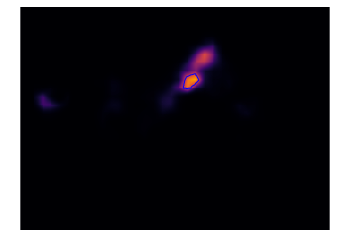

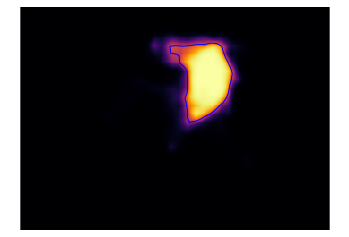

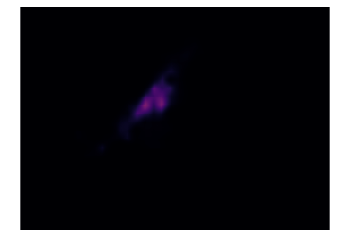

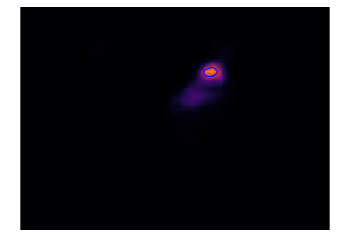

[(1110, ''), (2221, ''), (3332, ''), (4443, ''), (5063, ''), (5174, ''), (5285, ''), (5396, ''), (5507, ''), (110, ''), (221, ''), (332, ''), (443, ''), (554, ''), (665, ''), (776, ''), (887, ''), (998, ''), (1109, ''), (1221, '111859 1 118239 3 118658 3 119079 1 120688 13 121103 24 121521 29 121939 32 122359 32 122779 34 123198 37 123617 39 124035 42 124454 44 124873 45 125288 55 125706 60 126124 63 126543 64 126963 67 127382 71 127801 74 128220 76 128638 80 129057 82 129476 84 129895 86 130314 87 130734 88 131153 90 131572 91 131989 94 132408 95 132827 96 133247 96 133666 97 134085 98 134503 100 134921 102 135339 104 135757 106 136175 108 136593 110 137011 111 137431 111 137851 111 138270 112 138690 109 139110 109 139531 107 139951 107 140371 106 140791 105 141211 104 141631 104 142051 103 142471 102 142891 101 143311 100 143731 99 144151 97 144571 96 144991 96 145415 89 145836 86 146257 84 146679 80 147101 76 147524 71 147947 66 148367 64 148788 63 149208 58 149629 41 150050 31 1504

In [23]:
RLE = []
for i, f in zip(indices, orderedfnames):
    # Load the prediction file
    pred = uns.prediction(f, untrim=2)
    # Apply masking function
    pred.new_prediction('50',lambda x:x>0.5)
    
    # Apply size-based cutoff and output RLE
    pixelcount = np.sum(pred.predmasks['50'].image)/255
    if pixelcount < 1000:
        RLE.append((i,''))
    else:
        RLE.append((i,pred.predmasks['50'].RLE))
                   
    # Plot every 400
    if i%400 == 0:
        pred.heatmap()
        plt.show()
print(RLE)

In [8]:
mask = pred.predmasks['50'].image


In [28]:
out = '\n'.join('{i},{rle}'.format(i=r[0],rle=r[1]) for r in RLE)
with open('output.txt','w') as f:
    f.write('img,pixels\n')
    f.write(out)